In [5]:
!pip install yfinance==0.2.40
!mamba install bs4==4.10.0 -y
!pip install nbformat==5.10.4


/bin/bash: line 1: mamba: command not found
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: nbformat
    Found existing installation: nbformat 4.2.0
    Uninstalling nbformat-4.2.0:
      Successfully uninstalled nbformat-4.2.0


In [6]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots


##**Define Graphing Function**

In this section, we define the function make_graph. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.

In [7]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [8]:
#Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is TSLA.
tesla = yf.Ticker("TSLA")

In [52]:
#Using the ticker object and the function history extract stock information and save it in a dataframe named tesla_data. Set the period parameter to max so we get information for the maximum amount of time.
tesla_data = tesla.history(period="max")

In [10]:
#Reset the index using the reset_index(inplace=True) function on the tesla_data DataFrame and display the first five rows of the tesla_data dataframe using the head function.
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [11]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data  = requests.get(url).text
print(html_data)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla r

In [12]:
#Parse the html data using beautiful_soup.

soup = BeautifulSoup(html_data, 'html5lib')

In [54]:
#Using BeautifulSoup or the read_html function extract the table with Tesla Revenue and store it into a dataframe named tesla_revenue
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Parse the HTML to find the rows
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text

    # Append the data of each row to the DataFrame
    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)



In [16]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

In [17]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [18]:
tesla_revenue.tail()

,Date,Revenue
8,2013,"$2,013"
9,2012,$413
10,2011,$204
11,2010,$117
12,2009,$112


In [41]:
gme = yf.Ticker("GME")

In [42]:
gme_data = gme.history(period="max")


In [43]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [44]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"


In [45]:
html_data  = requests.get(url).text
print(html_data)
soup = BeautifulSoup(html_data, 'html5lib')

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><script type="text/javascript" async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download"></script><script async="" type="text/javascript" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download"></script><script async="" src="./

In [46]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Parse the HTML to find the rows
tbody = soup.find("tbody")
if tbody:
    rows = tbody.find_all('tr')
    for row in rows:
        cols = row.find_all("td")
        if len(cols) >= 2:
            date = cols[0].text
            revenue = cols[1].text

            # Append the data of each row to the DataFrame
            gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

In [47]:
gme_revenue.tail()

,Date,Revenue
11,2009,"$8,806"
12,2008,"$7,094"
13,2007,"$5,319"
14,2006,"$3,092"
15,2005,"$1,843"


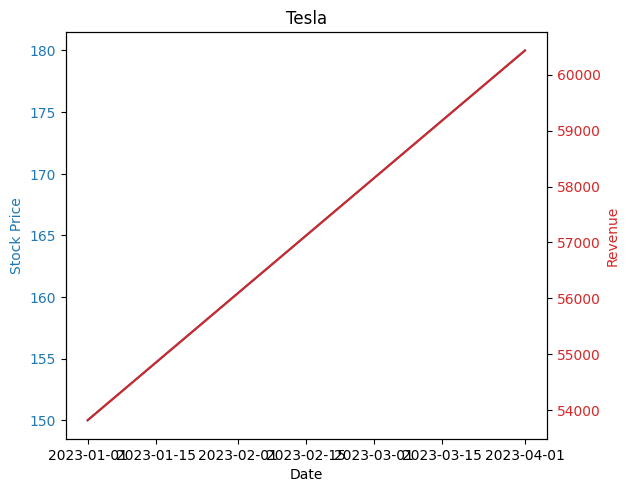

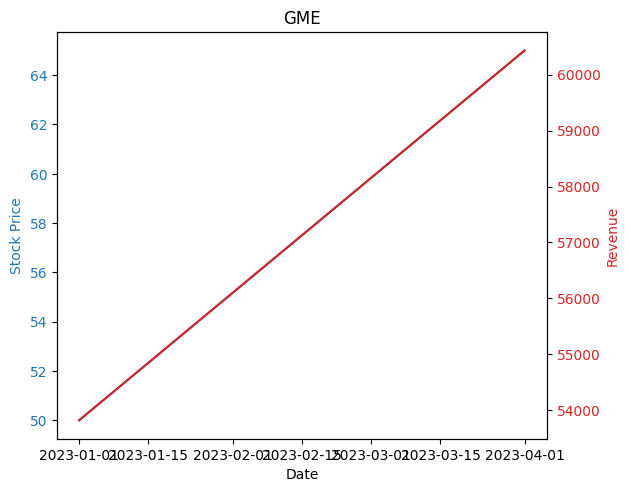

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# Sample HTML content for demonstration
html_content = """
<table>
    <tbody>
        <tr><td>2023-01-01</td><td>$53,823</td></tr>
        <tr><td>2023-04-01</td><td>$60,432</td></tr>
        <!-- More rows -->
    </tbody>
</table>
"""

soup = BeautifulSoup(html_content, "html.parser")

# Create an empty DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Parse the HTML to find the rows for Tesla revenue
tbody = soup.find("tbody")
if tbody:
    rows = tbody.find_all('tr')
    for row in rows:
        cols = row.find_all("td")
        if len(cols) >= 2:
            date = cols[0].text
            revenue = cols[1].text

            # Append the data of each row to the DataFrame
            tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)
            gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

# Clean the Revenue columns
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace('[\$,]', '', regex=True).astype(float)
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace('[\$,]', '', regex=True).astype(float)

# Convert the Date columns to datetime
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])

# Sample data for Tesla stock prices
tesla_data = pd.DataFrame({
    "Date": ["2023-01", "2023-04"],
    "Close": [150, 180]
})
tesla_data["Date"] = pd.to_datetime(tesla_data["Date"])

# Function to create the graph
def make_graph(stock_data, revenue_data, title):
    fig, ax1 = plt.subplots()

    # Plot the stock data
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price", color="tab:blue")
    ax1.plot(stock_data["Date"], stock_data["Close"], color="tab:blue", label="Stock Price")
    ax1.tick_params(axis="y", labelcolor="tab:blue")

    # Create a second y-axis for the revenue data
    ax2 = ax1.twinx()
    ax2.set_ylabel("Revenue", color="tab:red")
    ax2.plot(revenue_data["Date"], revenue_data["Revenue"], color="tab:red", label="Revenue")
    ax2.tick_params(axis="y", labelcolor="tab:red")

    # Add title and show the plot
    fig.tight_layout()
    plt.title(title)
    plt.show()

# Create the graph for Tesla
make_graph(tesla_data, tesla_revenue, "Tesla")

# Sample data for GME stock prices (for demonstration purposes)
gme_data = pd.DataFrame({
    "Date": ["2023-01", "2023-04"],
    "Close": [50, 65]
})
gme_data["Date"] = pd.to_datetime(gme_data["Date"])

# Create the graph for GME
make_graph(gme_data, gme_revenue, "GME")
